# CHARGEMENT DU JEU DE DONNEES 1

# Import

In [65]:
import seaborn as sns
import pandas as pd
import numpy as np
import zipfile
from matplotlib import pyplot as plt
import re


from fonction_import_data import afficher_fichier_zip, import_data, readme

# Lecture des données

## Chemin où est stocké le dossier DATA1.zip

In [2]:
path = '/Users/sardor/Documents/PIP_2022NA/'

## Import des données

In [3]:
#Arborescence des fichiers 
afficher_fichier_zip(path, 'DATA1.zip')

['DATA1/',
 'DATA1/DONNEES_BRUTES/',
 'DATA1/DONNEES_BRUTES/DATA_FRAUDE_LANGUEDOC.csv',
 'DATA1/DONNEES_BRUTES/DATA_FRAUDE_TOULOUSE.csv',
 'DATA1/DONNEES_CONCAT_TLSE-LD/',
 'DATA1/DONNEES_CONCAT_TLSE-LD/DATA1_COMPLET.csv',
 'DATA1/DONNEES_CONCAT_TLSE-LD/ID_FRAUDE.CSV',
 'DATA1/ECHANTILLONS/',
 'DATA1/ECHANTILLONS/ECHANTILLON10/',
 'DATA1/ECHANTILLONS/ECHANTILLON10/TRAIN/',
 'DATA1/ECHANTILLONS/ECHANTILLON10/TRAIN/x_train_10.csv',
 'DATA1/ECHANTILLONS/ECHANTILLON10/TRAIN/y_train_10.csv',
 'DATA1/ECHANTILLONS/ECHANTILLON10/TEST/',
 'DATA1/ECHANTILLONS/ECHANTILLON10/TEST/x_test_10.csv',
 'DATA1/ECHANTILLONS/ECHANTILLON10/TEST/y_test_10.csv',
 'DATA1/ECHANTILLONS/ECHANTILLON10/echantillon10.csv',
 'DATA1/ECHANTILLONS/ECHANTILLON50/',
 'DATA1/ECHANTILLONS/ECHANTILLON50/TRAIN/',
 'DATA1/ECHANTILLONS/ECHANTILLON50/TRAIN/x_train_50.csv',
 'DATA1/ECHANTILLONS/ECHANTILLON50/TRAIN/y_train_50.csv',
 'DATA1/ECHANTILLONS/ECHANTILLON50/TEST/',
 'DATA1/ECHANTILLONS/ECHANTILLON50/TEST/x_test_50.csv',
 

## Lecture du READ ME

In [4]:
readme(path, 'DATA1.zip', 'DATA1/README.txt')

b'\r\n'
b'Ce dossier ZIP contient :\r\n'
b'\t1- Un dossier "DONNEES_BRUTES"  :\r\n'
b'\t- DATA_FRAUDE_LANGUEDOC.csv et DATA_FRAUDE_TOULOUSE.csv : les jeux donnees bruts pour Toulouse et Languedoc fournis par le Credit Agricole sans aucune modification.\r\n'
b'\t2- Un dossier "DONNEES_CONCAT_TLSE-LD":\r\n'
b'\t- DATA1_COMPLET.csv : Concatenation des jeux de donnees Toulouse et Languedoc.\r\n'
b'\t- ID_FRAUDE.csv : fichier csv contenant les colonnes id et TOP_FRAUDE (fraude (1), pas fraude (0))\r\n'
b'\t3- Un dossier "ECHANTILLONS" : \r\n'
b"\t\tUn dossier ECHANTILLON10 --> ech10.CSV echantillon de 10% des donn\xc3\xa9es concatenees (TLSE+LANGUEDOC) avec leurs jeux d'entrainement et de test.\r\n"
b"\t\tUn dossier ECHANTILLON50 --> ech50.csv echantillon de 50% des donn\xc3\xa9es concatenees (TLSE+LANGUEDOC) avec leurs jeux d'entrainement et de test.\r\n"
b'\t4- - Dictionnaire_Data1.xlsx : Dictionnaire des donnees\r\n'
b'\r\n'
b'\r\n'
b'\r\n'
b'\r\n'
b'\r\n'
b'\r\n'
b'\r\n'
b'\r\n'


## Comment lire un fichier CSV ?

In [117]:
df = import_data(path, 'DATA1/ECHANTILLONS/ECHANTILLON10/echantillon10.csv', 'DATA1.zip')
df

,ID,TOP_FRAUDE,TOP_FRAUDE_CARTE,TOP_FRAUDE_VIREMENT,Date_debut_fraude,cp_ou_pays,SECTEUR_GESTION,INDICMAIL,INDICTEL,INDICPOR,...,mt_factu_ttc_M,mt_factu_ttc_M6,mt_reduc_ttc_M,mt_reduc_ttc_M6,mt_rist_ttc_M,mt_rist_ttc_M6,Fidelite_calcule,Flag_bq_principale,profil,localisation
0,831KFcsZovqRwkmyqAJhBfPGA==,1,1,0,07JUL2020,SÎUVf,SECTEUR OUEST,MAIL_OPTIN,TEL_NEUTRE,POR_OPTIN,...,-46.0,130.0,0.0,0.0,0.0,0.0,FI,1.0,Digital Web,toulouse
1,835qrimyjXd7SPpng/cWuEz/w==,1,1,0,NaN,céyaÏ,SECTEUR ALES CVN,MAIL_OPTIN,TEL_OPTIN,POR_OPTOUT,...,7.0,6.0,0.0,0.0,0.0,0.0,QF,1.0,Full digital,languedoc
2,8353Z+loQUqfodVSdCZp3naCg==,1,0,1,NaN,tîêÅÊ,SECTEUR VALLEE DU RHONE,MAIL_OPTOUT,TEL_OPTIN,POR_OPTOUT,...,0.0,0.0,0.0,0.0,0.0,0.0,NF,0.0,Peu actifs Ma banque,languedoc
3,831rqXmvv7DhGKOKHAmM/3tGw==,1,0,1,15OCT2020,æËYJ3,SECTEUR OUEST,MAIL_OPTOUT,TEL_OPTIN,POR_OPTOUT,...,2.0,2.0,0.0,0.0,0.0,0.0,FI,1.0,Digital Web modéré,toulouse
4,835M+SkL1tyzkjT6KCrMZlkNg==,1,0,1,NaN,céÎYG,SECTEUR BEZIERS,MAIL_OPTIN,TEL_OPTIN,POR_OPTIN,...,28.0,6.0,0.0,0.0,0.0,0.0,FI,1.0,Hyper actifs,languedoc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84930,835Lc+970tiDoDBovevaK4LYA==,0,0,0,NaN,gíÇXN,SECTEUR MONTPELLIER PIC ST LOUP,MAIL_OPTIN,TEL_OPTOUT,POR_OPTIN,...,47.0,5.0,0.0,0.0,0.0,0.0,QF,1.0,Digital Web modéré,languedoc
84931,835a1IzTiIqW+DZI7N0vRVW5A==,0,0,0,NaN,çÊpÀu,SECTEUR NARBONNE,MAIL_NEUTRE,TEL_OPTIN,POR_OPTIN,...,6.0,6.0,0.0,0.0,0.0,0.0,QF,1.0,sans contact,languedoc
84932,835cKBDV4caS5EOVeLxdsRZLQ==,0,0,0,NaN,ïÎkhw,SECTEUR BEZIERS,MAIL_NEUTRE,TEL_OPTIN,POR_NEUTRE,...,8.0,8.0,0.0,0.0,0.0,0.0,FI,1.0,Très peu actifs,languedoc
84933,835CKVu+z3oofUX0nmQlmhgPw==,0,0,0,NaN,ÍlPFE,SECTEUR BEZIERS,MAIL_NEUTRE,TEL_OPTIN,POR_NEUTRE,...,6.0,6.0,0.0,0.0,0.0,0.0,NF,0.0,Très peu actifs,languedoc


## Descrption

In [118]:
df.describe().round(2)

,TOP_FRAUDE,TOP_FRAUDE_CARTE,TOP_FRAUDE_VIREMENT,TOP_E_RELEVE,MESSAGERIE_WEB_ACTIVE,FIAB_TEL_DOMICILE,FIAB_TEL_TRAVAIL,FIAB_TEL_PORTABLE,FIAB_EMAIL,REFUS_SEA,...,top_produit_Credit,top_produit_Epargne,top_produit_Services,mt_factu_ttc_M,mt_factu_ttc_M6,mt_reduc_ttc_M,mt_reduc_ttc_M6,mt_rist_ttc_M,mt_rist_ttc_M6,Flag_bq_principale
count,84935.00,84935.00,84935.00,84838.0,84838.00,84838.00,84838.00,84838.00,84838.00,84838.00,...,84516.00,84516.00,84516.00,74966.00,74966.00,74966.00,74966.00,74966.00,74966.00,84647.00
mean,0.00,0.00,0.00,0.5,0.67,0.46,0.03,0.86,0.42,0.01,...,0.60,0.82,0.95,20.42,18.68,0.02,0.01,0.77,0.99,0.72
std,0.04,0.03,0.04,0.5,0.49,0.50,0.18,0.34,0.49,0.08,...,0.49,0.38,0.21,61.44,53.06,2.78,0.87,7.78,8.87,0.45
min,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,-860.00,-490.00,-320.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.0,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,1.00,1.00,2.00,2.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.0,1.00,0.00,0.00,1.00,0.00,0.00,...,1.00,1.00,1.00,7.00,6.00,0.00,0.00,0.00,0.00,1.00
75%,0.00,0.00,0.00,1.0,1.00,1.00,0.00,1.00,1.00,0.00,...,1.00,1.00,1.00,15.00,14.00,0.00,0.00,0.00,0.00,1.00
max,1.00,1.00,1.00,1.0,5.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,3600.00,4600.00,560.00,120.00,530.00,420.00,1.00


## Le sexe des clients ayant subi une fraude

<AxesSubplot:title={'center':'Sexe des client ayant subi une fraude'}>

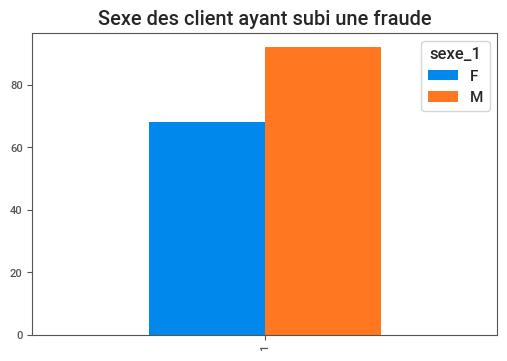

In [134]:
df1 = df[df['TOP_FRAUDE']==1]
Sexe_fraude = pd.crosstab(df1.TOP_FRAUDE, df1.sexe_1)
Sexe_fraude.plot.bar(title = "Sexe des client ayant subi une fraude",legend=True,xlabel='')

## Comparaison de la loclisation des clients

In [128]:
pd.crosstab(df.localisation, "freq")


col_0,freq
localisation,
languedoc,58270
toulouse,26665


On remarque que la majorité des clients sont localisés en Languedoc

## Comparaison de la loclisation des clients fraudés

<AxesSubplot:title={'center':'Loclisation des clients fraudés'}>

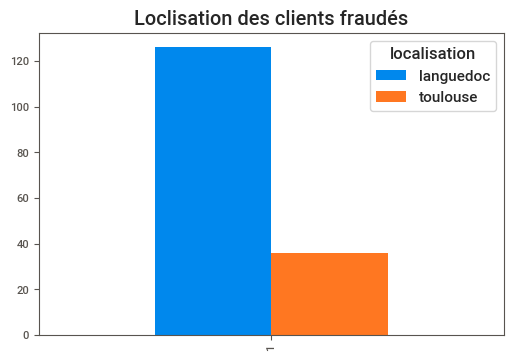

In [135]:
df1 = df[df['TOP_FRAUDE']==1]
Loc_cli = pd.crosstab(df1.TOP_FRAUDE, df1.localisation)
Loc_cli.plot.bar(title = "Loclisation des clients fraudés",legend=True,xlabel='')




## Frequence de chaque secteur de gestion

<AxesSubplot:xlabel='SECTEUR_GESTION'>

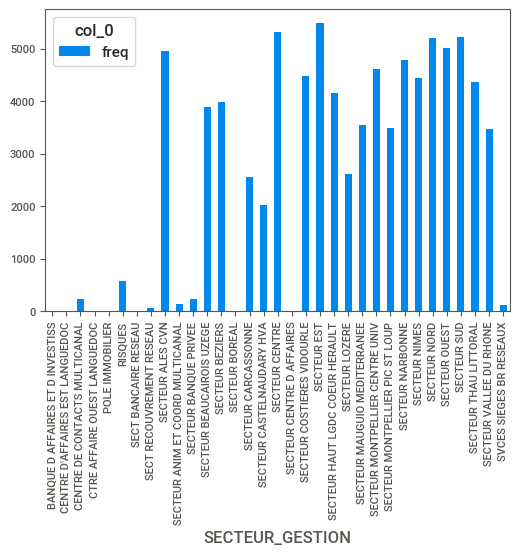

In [136]:
Freq_secteur_gestion = pd.crosstab(nom_fichier.SECTEUR_GESTION,"freq")
Freq_secteur_gestion.plot.bar()

## INDICPOR par localisation

<AxesSubplot:title={'center':'INDICPOR par localisation'}>

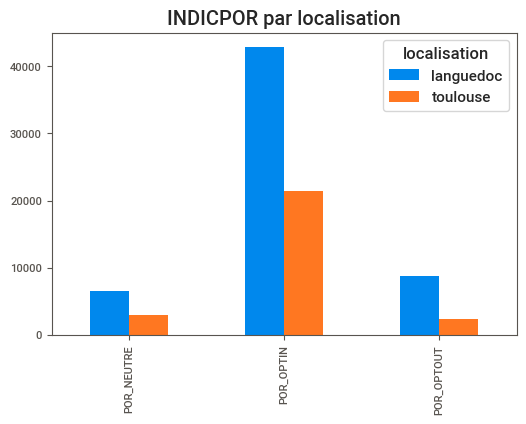

In [137]:
Loc_indicpor = pd.crosstab(df.INDICPOR, df.localisation)
Loc_indicpor.plot.bar(title = "INDICPOR par localisation",legend=True,xlabel='')

## INDICTEL par localisation

<AxesSubplot:title={'center':'INDICTEL par localisation'}>

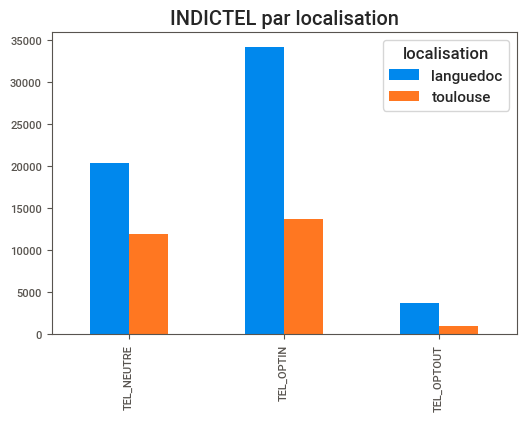

In [138]:
Loc_indictel = pd.crosstab(df.INDICTEL, df.localisation)
Loc_indictel.plot.bar(title = "INDICTEL par localisation",legend=True,xlabel='')

## INDICMAIL par localisation 

<AxesSubplot:title={'center':'Proportion des clients par indicmail'}>

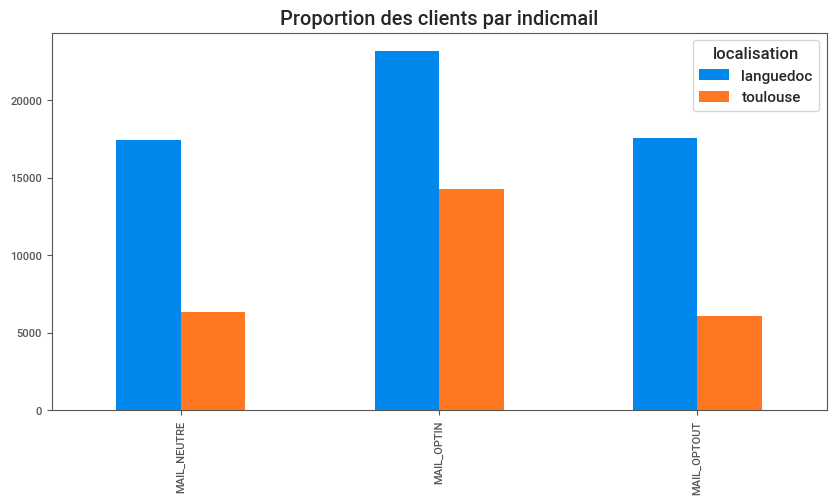

In [143]:
Loc_indicmail = pd.crosstab(df.INDICMAIL, df.localisation)
Loc_indicmail.plot.bar(figsize=(10,5),xlabel='',title='Proportion des clients par indicmail')


## Tranche d'age des fraudés pour le client 1

<AxesSubplot:title={'center':'Pourcentage des fraudés en fonction de leur age (client 3)'}>

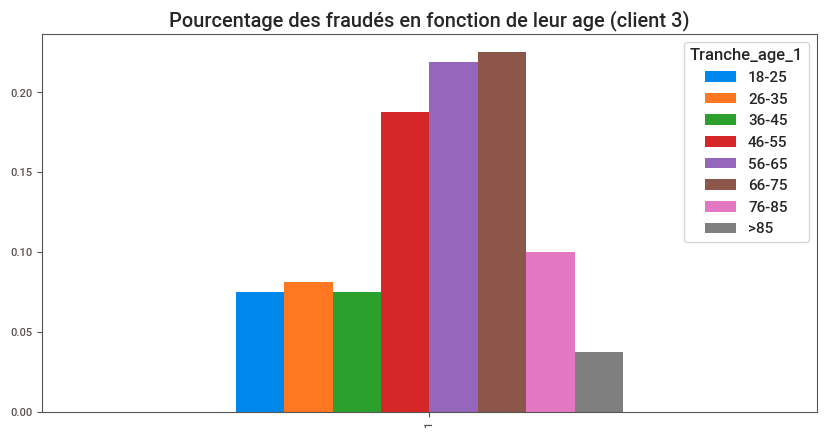

In [150]:
df1 = df[df['TOP_FRAUDE']==1]
Age_fraude= pd.crosstab(df1.TOP_FRAUDE, df1.Tranche_age_1).apply(lambda r: r/r.sum(), axis=1)
Age_fraude.plot.bar(figsize=(10,5),xlabel='',title="Pourcentage des fraudés en fonction de leur age (client 3)")

## Tranche d'age des fraudés pour le client 2

<AxesSubplot:title={'center':'Pourcentage des fraudés en fonction de leur age (client 2)'}>

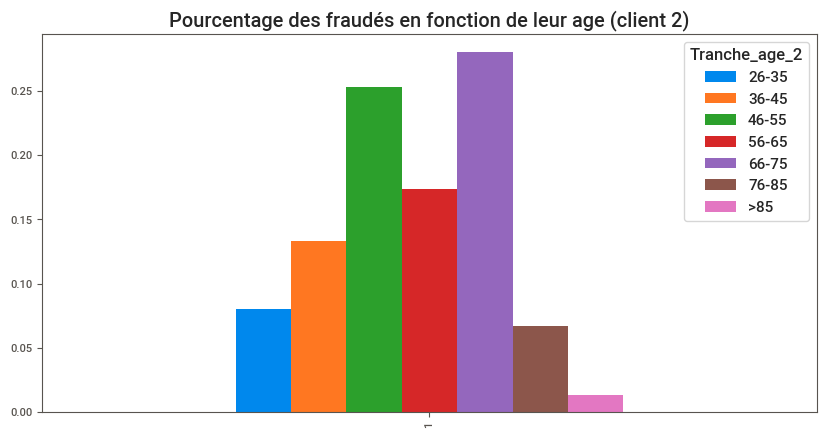

In [148]:
df1 = df[df['TOP_FRAUDE']==1]
Age_fraude= pd.crosstab(df1.TOP_FRAUDE, df1.Tranche_age_2).apply(lambda r: r/r.sum(), axis=1)
Age_fraude.plot.bar(figsize=(10,5),xlabel='',title="Pourcentage des fraudés en fonction de leur age (client 2)")

## Matrice de corrélation (illisible)

<AxesSubplot:>

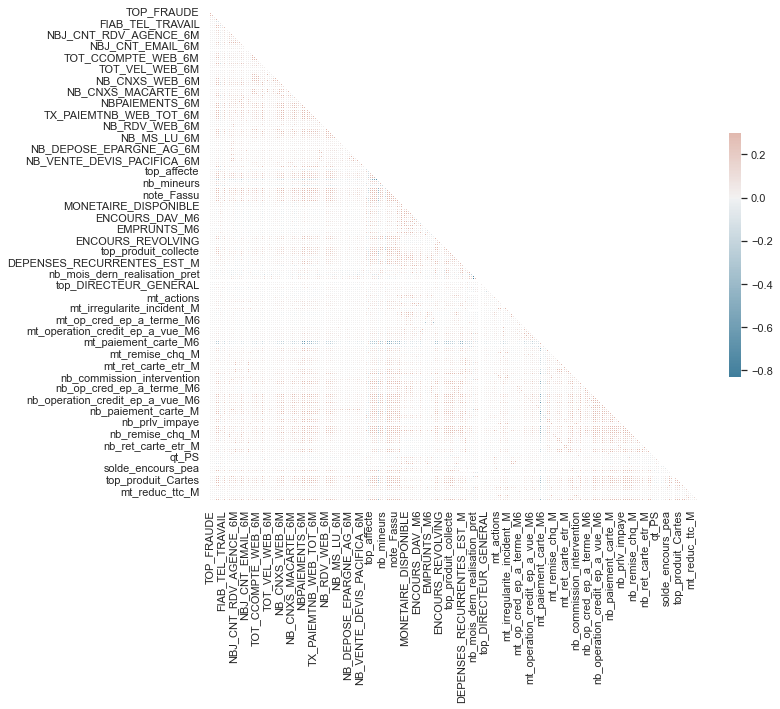

In [16]:
sns.set_theme(style="white")


# matrice de corrélation
corr = nom_fichier.corr()

# masque pour le triange supérieur 
mask = np.triu(np.ones_like(corr, dtype=bool))

# mise en place de la figure
f, ax = plt.subplots(figsize=(11, 9))

# degradé de couleur
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# heat map + masque
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Rapport avec la librairie sweetviz

In [17]:
import sweetviz as sv
from ipywidgets import IntProgress
my_report = sv.analyze(nom_fichier, pairwise_analysis='off')
my_report.show_html("MyReport.html")

                                             |      | [  0%]   00:00 -> (? left)

Report MyReport.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Recherche des couples de variables les plus corréles 

### On calcule toutes les corrélations entre les variable

In [159]:
corr_matrix = df.corr().abs()

#la matrice est symetrique on garde donc que le triange superieur sans la diagonale (k = 1)

df_cor = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))
df_cor
#first element of sol series is the pair with the biggest correlation



/var/folders/fz/s504p4md7hv8w1295wj7d20m0000gn/T/ipykernel_48812/892550989.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_cor = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


NB_JR_CABOURSE_6M           NB_CNXS_CABOURSE_6M                9.998905e-01
qt_oblig                    qt_oblig_tiers                     9.998627e-01
NB_JR_MBANQUE_6M            NB_CNXS_MBANQUE_6M                 9.994225e-01
TOT_CNX_WEB_WEEK_6M         NB_CNXS_WEB_6M                     9.973812e-01
ENCOURS_CREDIT              ENCOURS_HABITAT                    9.899160e-01
                                                                   ...     
NB_RDV_WEB_6M               top_ADMINISTRATEUR                 1.642941e-06
mt_dernier_revenu_declare   perte_societaire_M                 1.250873e-06
REFUS_SEA                   mt_op_cred_ep_a_terme_M            7.927574e-07
TOP_FRAUDE_CARTE            mt_operation_credit_ep_a_vue_M6    7.789095e-07
NBJ_CNT_AUTOMATES_DEPOT_6M  TOT_VEL_WEB_6M                     1.501217e-07
Length: 32355, dtype: float64

### On garde que les couples dont la corrélation >= 0.80

In [160]:
for i in range(len(df_cor)) :
    if df_cor[i]>= 0.80 :
        index=i


In [161]:
df_cor=df_cor[:index]

### On transforme cela en data frame

In [162]:
df_cor = df_cor.to_frame(name="Correlation")


In [163]:
df_cor=df_cor.reset_index()

In [174]:
df_cor=df_cor.rename(columns={'level_0': 'Var1', 'level_1': 'Var2'})

### Fonction qui permet de trouver une variable donnée dans ce data frame 

In [178]:
var_rechercher = input("Variable recherchée ? ")
df_cor[df_cor.eq(var_rechercher).any(1)]

Variable recherchée ? TOP_FRAUDE


,Var1,Var2,Correlation
71,TOP_FRAUDE,TOP_FRAUDE_VIREMENT,0.804806
